[[  8.47740682]
 [  1.3867772 ]
 [  1.79101355]
 [  0.86929336]
 [ -0.74999221]
 [ -0.61566609]
 [  2.29293315]
 [  1.01479685]
 [ -2.56250495]
 [ -1.07876101]
 [ -3.11143178]
 [  0.90490124]
 [  1.83525777]
 [ -0.23292243]
 [ -0.51610552]
 [ 16.34255078]
 [ -1.57685711]
 [  2.47160719]
 [ -0.02530333]
 [ -0.35163579]
 [  4.11552552]]
[ 44.104164]


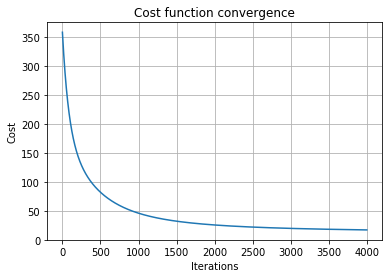

ValueError: shapes (22,) and (21,1) not aligned: 22 (dim 0) != 21 (dim 0)

In [36]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt

filename = 'sarcos_inv.csv'
#load csv data
puredata = np.loadtxt(filename, delimiter=',')
X = puredata[:300,:20]
Y = puredata[:300,21]
# print(X[1,:])
# print('Y: {}'.format(Y[1,:]))
def normalization(x):
    mean_x = [];
    std_x = [];
    X_normalized = x;
    temp = x.shape[1]
    for i in range(temp):
        m = np.mean(x[:, i])
        s = np.std(x[:, i])
        mean_x.append(m)
        std_x.append(s)
        X_normalized[:, i] = (X_normalized[:, i] - m) / s
    return X_normalized, mean_x, std_x

def cost(x,y,theta):
    m = y.size #number of training examples
#     print(x.shape,theta.shape)
    predicted = np.dot(x,theta)
    sqErr = (predicted - y)
    J = (1.0) / (2 * m) * np.dot(sqErr.T, sqErr)
    return J
def gradient_descent(x, y, theta, alpha, iterations):
#gradient descent algorithm to find optimal theta values
    m = y.size
#theta size
    theta_n = theta.size  
#cost history  
    J_theta_log = np.zeros(shape=(iterations+1, 1))
#store initial values in to log    
    J_theta_log[0, 0] = cost(x, y, theta)
 
    for i in range(iterations):
        
#split equation in to several parts
        predicted = x.dot(theta)

        for thetas in range(theta_n):
            tmp = x[:,thetas]
            tmp.shape = (m,1)
            err = (predicted - y) * tmp
            theta[thetas][0] = theta[thetas][0] - alpha * (1.0 / m) * err.sum()
        J_theta_log[i+1, 0] = cost(x, y, theta)

    return theta, J_theta_log

#size of training set
m,n = np.shape(X)
#shaping Y to [m,1] matrix
Y.shape = (m, 1)
#Scale features
x_scale, mean_r, std_r = normalization(X)

#Add a column of ones to X as x0=1 
XX = np.ones(shape=(m,1))
XX = np.append(XX,x_scale,1)

#set up initial thetas to 0
theta = np.zeros(shape=(n+1, 1))
#define number of iterations and alpha
iterations = 4000
alpha = 0.001
#calculate theta using gradient descent
theta, J_theta_log = gradient_descent(XX, Y, theta, alpha, iterations)
print(theta)
print(Y[1,:])
#print(J_log)
fig = plt.figure('Cost function convergence')
plt.plot(J_theta_log)
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function convergence')
plt.show()

Y_t = puredata[311,21]
predicted = 0

for j in range(n-1):
    puredata[311,j+1] -= (mean_r[j]/std_d[j])
predicted = puredata[311,:].dot(theta) 

print(predicted[100],Y_t[100])
print(ssd)
